## 🎮 Task 9: Apply RLlib Algorithm to Atari Environment

We applied the **Deep Q-Network (DQN)** algorithm from **Ray RLlib** to the **ALE/Pong-ram-v5** environment, using Gymnasium's Atari integration.

### 🤖 Why DQN?
- DQN is well-suited for environments with **discrete action spaces** like Atari games.
- It uses deep neural networks to approximate Q-values, enabling it to learn effective policies directly from raw RAM inputs.
- RLlib's implementation supports scalable and modular training with easy integration of exploration strategies.

### 🕹️ Why Pong-ram?
- Unlike image-based Pong variants, `Pong-ram-v5` uses a compact 128-byte RAM state representation, allowing **faster training** and **lower computational overhead**.
- The environment retains the **same game mechanics and reward structure** as visual Pong, making it an effective benchmark.
- It enables testing of learning dynamics without convolutional networks, making it ideal for MLP-based DQN agents.

### ⚙️ Setup Summary
- **Algorithm**: DQN
- **Environment**: ALE/Pong-ram-v5
- **Training Episodes**: 500
- **Model Architecture**: MLP with two hidden layers (256 units, ReLU activation)
- **Exploration**: Epsilon-Greedy (from 1.0 → 0.01 over 200k steps)
- **Learning Rate**: 1e-4
- **Discount Factor**: 0.99
- **Batch Size**: 32
- **Framework**: PyTorch (`framework="torch"`)
- **Rollout Workers**: 0 (single-process training for compatibility with notebooks)

The agent was trained using a basic DQN setup with no dueling or double Q enhancements to evaluate the baseline performance on RAM-based Atari inputs.

In [1]:
import gymnasium as gym
import ray
import matplotlib.pyplot as plt
from ray.rllib.algorithms.dqn import DQNConfig

2025-05-11 03:22:44,879	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!
2025-05-11 03:22:46,259	WARNING deprecation.py:50 -- DeprecationWarning: `build_tf_policy` has been deprecated. This will raise an error in the future!
2025-05-11 03:22:46,267	WARNING deprecation.py:50 -- DeprecationWarning: `build_policy_class` has been deprecated. This will raise an error in the future!


In [2]:
config = (
    DQNConfig()
    .environment(env="ALE/Pong-ram-v5")  # Gymnasium Atari env format
    .framework("torch")
    .resources(num_gpus=0)  # Set to 1 if CUDA GPU available and torch w/ CUDA installed
    .rollouts(num_rollout_workers=0)  # Use 1 or more if not on Jupyter
    .training(
        gamma=0.99,
        lr=1e-4,
        train_batch_size=32,
        model={"fcnet_hiddens": [256], "fcnet_activation": "relu"},
        num_steps_sampled_before_learning_starts=1000
    )
    .exploration(
        exploration_config={
            "type": "EpsilonGreedy",
            "initial_epsilon": 1.0,
            "final_epsilon": 0.01,
            "epsilon_timesteps": 200_000
        }
    )
    .debugging(log_level="WARN")
)

In [3]:
from ray.rllib.algorithms.dqn import DQN

algo = config.build()
avg_rewards = []

for episode in range(500):  
    result = algo.train()
    reward = result["episode_reward_mean"]
    print(f"Episode {episode} - Avg Reward: {reward:.2f}")
    avg_rewards.append(reward)

2025-05-11 03:22:46,347	WARNING deprecation.py:50 -- DeprecationWarning: `rllib/algorithms/simple_q/` has been deprecated. Use `rllib_contrib/simple_q/` instead. This will raise an error in the future!
C:\Users\elias\anaconda3\envs\rllib-atari\lib\site-packages\ray\rllib\algorithms\algorithm.py:484: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
C:\Users\elias\anaconda3\envs\rllib-atari\lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.


Episode 0 - Avg Reward: -21.00
Episode 1 - Avg Reward: -21.00
Episode 2 - Avg Reward: -21.00
Episode 3 - Avg Reward: -21.00
Episode 4 - Avg Reward: -21.00
Episode 5 - Avg Reward: -21.00
Episode 6 - Avg Reward: -20.86
Episode 7 - Avg Reward: -20.62
Episode 8 - Avg Reward: -20.56
Episode 9 - Avg Reward: -20.60
Episode 10 - Avg Reward: -20.64
Episode 11 - Avg Reward: -20.67
Episode 12 - Avg Reward: -20.54
Episode 13 - Avg Reward: -20.60
Episode 14 - Avg Reward: -20.62
Episode 15 - Avg Reward: -20.62
Episode 16 - Avg Reward: -20.53
Episode 17 - Avg Reward: -20.56
Episode 18 - Avg Reward: -20.58
Episode 19 - Avg Reward: -20.60
Episode 20 - Avg Reward: -20.62
Episode 21 - Avg Reward: -20.64
Episode 22 - Avg Reward: -20.57
Episode 23 - Avg Reward: -20.54
Episode 24 - Avg Reward: -20.56
Episode 25 - Avg Reward: -20.54
Episode 26 - Avg Reward: -20.56
Episode 27 - Avg Reward: -20.54
Episode 28 - Avg Reward: -20.48
Episode 29 - Avg Reward: -20.50
Episode 30 - Avg Reward: -20.52
Episode 31 - Avg R

### Plot the Learning Curve

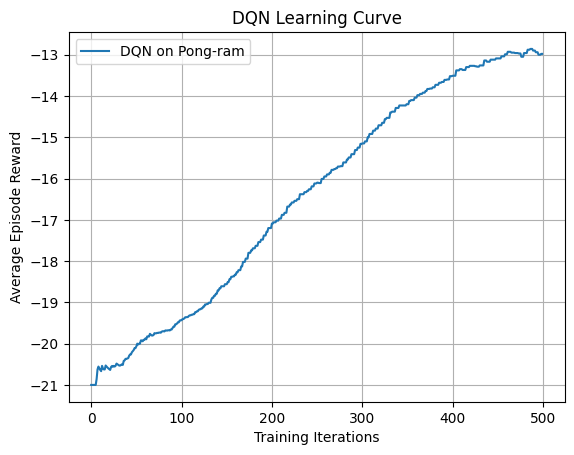

In [4]:
plt.plot(avg_rewards, label="DQN on Pong-ram")
plt.xlabel("Training Iterations")
plt.ylabel("Average Episode Reward")
plt.title("DQN Learning Curve")
plt.legend()
plt.grid(True)
plt.show()